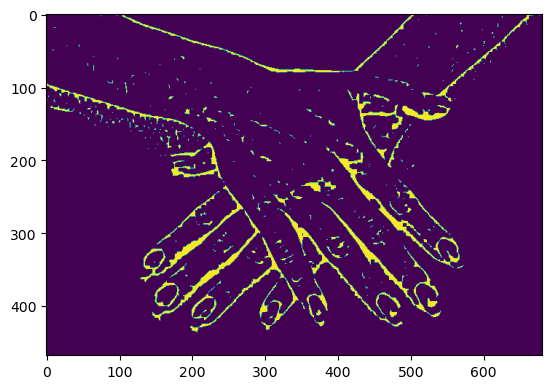

In [1]:
def adaptive_kmeans(image):
#     Convert image to grayscale
    image = cv2.normalize(image, None, alpha=0, beta=255, 
                       norm_type = cv2.NORM_MINMAX, 
                       dtype = cv2.CV_8UC1)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur
    blur = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply adaptive thresholding
    thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                   cv2.THRESH_BINARY_INV, 11, 2)

    # Apply morphological opening
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)

#     # Apply distance transform

    closing = cv2.erode(closing, kernel, iterations=1) 

    segmented = closing
    # Remove shadow effect
    # Calculate the median pixel intensity of the grayscale image
    median_intensity = np.median(gray)

    threshold = median_intensity
    
    img = image

    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    lower_skin = np.array([0,20,70], dtype=np.uint8)
    upper_skin = np.array([20,255,255], dtype = np.uint8)
    # mask 为映射
    mask = cv2.inRange(hsv, lower_skin, upper_skin)
    
        # Step 9
    img = cv2.bitwise_and(img, img, mask=mask)


#     # Apply the mask to the segmented image
    segmented = cv2.bitwise_or(segmented, segmented, mask=mask)

    # Convert back to uint8
    segmented = np.uint8(segmented)

    return segmented
    
def hand_segmentation(image):
    # Convert image to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hsv = image

    # Define range of skin color in HSV
    lower_skin = np.array([0, 20, 70], dtype=np.uint8)
    upper_skin = np.array([20, 255, 255], dtype=np.uint8)

    # Threshold the image to get only skin color
    mask = cv2.inRange(hsv, lower_skin, upper_skin)
    
    # Apply adaptive k-means algorithm for segmentation
    segmented = adaptive_kmeans(image)
    normalized = cv2.normalize(segmented, None, alpha=0, beta=255, 
                               norm_type = cv2.NORM_MINMAX, 
                               dtype = cv2.CV_8UC1)

    # Combine the two masks
    final_mask = cv2.bitwise_or(mask, segmented)
    final_mask = cv2.fastNlMeansDenoising(final_mask, None, 20, 7, 21)
    # Apply morphological closing to remove noise
    kernel = np.ones((5, 5), np.uint8)
    closing = cv2.morphologyEx(final_mask, cv2.MORPH_CLOSE , kernel)

    # Apply Gaussian blur to smooth edges
    blur = cv2.GaussianBlur(closing, (7, 7), 0)

    return blur
    
    

# 开始
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('hand.jpg')

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

lower_skin = np.array([0,20,70], dtype=np.uint8)
upper_skin = np.array([20,255,255], dtype = np.uint8)
# mask 为映射
mask = cv2.inRange(hsv, lower_skin, upper_skin)
 
kernel = np.ones((5,5),np.uint8)
closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel)

segmented = adaptive_kmeans(img)

plt.imshow(segmented)
plt.show()
segmented = cv2.bitwise_not(segmented)
# cv2.imshow('thresh',segmented)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

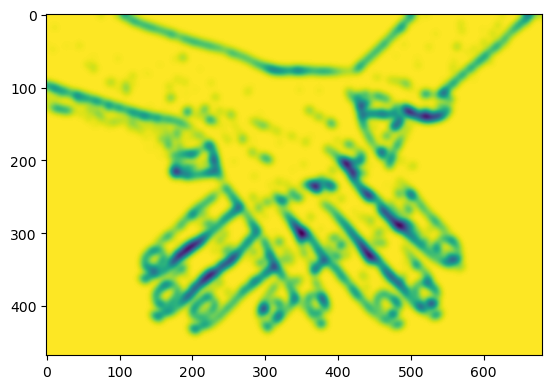

In [2]:
# Apply a Gaussian blur to the image to remove noise
blur = cv2.GaussianBlur(segmented, (19, 19), 0)
blur = cv2.GaussianBlur(blur, (7, 7), 0)
blur = cv2.GaussianBlur(blur, (5, 5), 0)
blur = cv2.GaussianBlur(blur, (7, 7), 0)
blur = cv2.GaussianBlur(blur, (19, 19), 0)


# blur = cv2.bitwise_not(blur)
plt.imshow(blur)
# cv2.imshow('thresh',blur)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

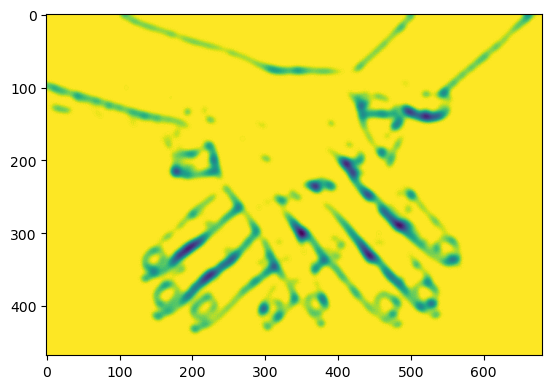

In [3]:
# 读取图片。
img = blur

# 双边滤波。
img = cv2.convertScaleAbs(img, alpha=1.1)
img = cv2.bilateralFilter(img, 9, 75, 75)

kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
img = cv2.filter2D(img, -1, kernel)
# 显示图像
plt.imshow( img)
# # 进程不结束，一直保持显示状态
# cv2.imshow('00',img)
# cv2.waitKey(0);

# #销毁所有窗口
# cv2.destroyAllWindows();

(61.03206442561917, 71.73404377776579, 86.88619489559164, 0.0)


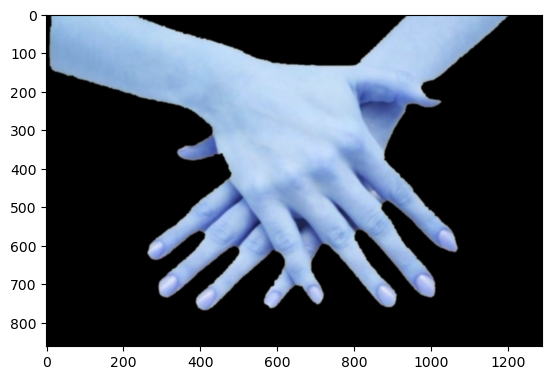

AttributeError: module 'cv2' has no attribute 'destroyAllWindow'

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image1 = cv2.imread('SAhand.jpg')
def adaptive_kmeans(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur
    blur = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply adaptive thresholding
    thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                   cv2.THRESH_BINARY_INV, 11, 2)

    # Apply morphological opening
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

    # Apply distance transform
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)

    # Apply thresholding
    ret, segmented = cv2.threshold(dist_transform, 0.5 * dist_transform.max(),
                                    255, 0)

    # Convert back to uint8
    segmented = np.uint8(segmented)

    return segmented


# 消除阴影
def hand_segmentation(image):
    # Convert image to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define range of skin color in HSV
    lower_skin = np.array([0, 20, 70], dtype=np.uint8)
    upper_skin = np.array([20, 255, 255], dtype=np.uint8)

    # Threshold the image to get only skin color
    mask = cv2.inRange(hsv, lower_skin, upper_skin)

    # Find contours of the skin region
    cnts = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    cnts = sorted(cnts, key=cv2.contourArea, reverse=True)

    # Draw the largest contour onto a new blank mask
    blank_mask = np.zeros(image.shape, dtype=np.uint8)
    cv2.drawContours(blank_mask, [cnts[0]], -1, (255, 255, 255), -1)

    # Perform a bitwise-and operation to get the result
    result = cv2.bitwise_and(image, blank_mask)
    
    # Apply shadow removal algorithm
    fgbg = cv2.createBackgroundSubtractorMOG2(128, cv2.THRESH_BINARY, 1)
    mask = fgbg.apply(result)
    result = cv2.bitwise_and(result, result, mask=mask)
#     result = cv2.bitwise_and(img,img,mask=opening)
    mean_val = cv2.mean(result, mask=mask)
    print(mean_val)

    # Apply morphological closing to remove noise
    kernel = np.ones((3, 3), np.uint8)
    closing = cv2.morphologyEx(result, cv2.MORPH_CLOSE, kernel)

    # Apply Gaussian blur to smooth edges
    blur = cv2.GaussianBlur(closing, (7, 7), 0)

    return blur


# img = cv2.imread("hand.jpg")
# img2 = contrast_stretching('hand.jpg')
# plt.imshow(img)
# Load image

# img2 = contrast_stretching('hand.jpg')
# Perform hand segmentation
segmented_image = hand_segmentation(image1)

plt.imshow(segmented_image)
plt.show()
cv2.imshow('-',segmented_image)
cv2.waitKey(0)
cv2.destroyAllWindow()

# hsv区域定位


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图像
img = cv2.imread('hand.jpg')

# 转换为HSV颜色空间
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# 根据HSV中的阈值初步定位手部区域
lower_skin = np.array([0, 20, 70], dtype=np.uint8)
upper_skin = np.array([20, 255, 255], dtype=np.uint8)
mask = cv2.inRange(hsv, lower_skin, upper_skin)

# # 使用形态学运算去噪并移除定位区域中的孔
kernel = np.ones((5,5),np.uint8)
closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel)

plt.imshow(mask)

# # 在程序中显示提取的手部图片，并计算根据像素的肤色区域的平均RGB颜色值并输出结果。
# result = cv2.bitwise_and(img,img,mask=opening)
# mean_val = cv2.mean(result, mask=opening)
# print(mean_val)
# contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# # 在原始图片中绘制轮廓
# cv2.drawContours(img, contours, -1, (0, 255, 0), 3)
# plt.imshow(img)
# plt.show()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图像
img = cv2.imread('hand.jpg')

# 转换为HSV颜色空间
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# 根据HSV中的阈值初步定位手部区域
lower_skin = np.array([0, 20, 70], dtype=np.uint8)
upper_skin = np.array([20, 255, 255], dtype=np.uint8)
mask = cv2.inRange(hsv, lower_skin, upper_skin)

# 使用形态学运算去噪并移除定位区域中的孔
kernel = np.ones((5,5),np.uint8)
closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel)

# 在程序中显示提取的手部图片，并计算根据像素的肤色区域的平均RGB颜色值并输出结果。
result = cv2.bitwise_and(img,img,mask=opening)
mean_val = cv2.mean(result, mask=opening)
print(mean_val)
contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# 在原始图片中绘制轮廓
cv2.drawContours(img, contours, -1, (0, 255, 0), 3)
plt.imshow(img)
plt.show()